<a href="https://colab.research.google.com/github/gyen97/Business-Analytics-IME654-/blob/master/PCA_CJE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd

import random


In [52]:
def generate_random_data(n,p):
    rand_institutions = ['A','B','C','D']
    data = pd.DataFrame(np.random.rand(n,p))
    institutions = [random.choice(rand_institutions) for x in range(len(data))]
    label = [random.choice([0,1]) for x in range(len(data))]
    colnames = ['A' + str(i) for i in range(p)]
    data.columns = colnames
    data['institutions'] = institutions
    data['mortality'] = label
    return data

In [54]:
dup=data

In [53]:
data = generate_random_data(500,50)

In [43]:
#data = pd.get_dummies(data, columns=['institutions'], drop_first=True)

In [24]:
data

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A42,A43,A44,A45,A46,A47,A48,A49,institutions,mortality
0,0.385617,0.176757,0.968984,0.810988,0.024882,0.958991,0.588699,0.468975,0.360854,0.522589,...,0.884881,0.723483,0.641810,0.167396,0.924055,0.255455,0.152287,0.079082,C,1
1,0.640704,0.025115,0.896683,0.176860,0.950494,0.028928,0.070319,0.803130,0.875667,0.697707,...,0.971788,0.888447,0.014013,0.632038,0.547354,0.225299,0.800455,0.282003,A,1
2,0.363928,0.716694,0.892474,0.918001,0.948284,0.031663,0.055680,0.118877,0.842153,0.575117,...,0.380611,0.249660,0.018982,0.785249,0.019896,0.926402,0.553554,0.442124,B,1
3,0.230933,0.566943,0.742204,0.906102,0.860352,0.192571,0.651770,0.830076,0.827774,0.601245,...,0.113768,0.914441,0.651932,0.781841,0.893934,0.940255,0.872945,0.843728,A,0
4,0.829349,0.286296,0.397962,0.988258,0.748584,0.102540,0.773771,0.145342,0.643105,0.635440,...,0.422922,0.815028,0.377708,0.310182,0.957177,0.910691,0.451493,0.639382,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.249628,0.233788,0.709421,0.670201,0.846253,0.465420,0.117488,0.967394,0.701210,0.818527,...,0.483467,0.636609,0.005894,0.550520,0.919139,0.069320,0.228780,0.916809,D,1
496,0.409992,0.163873,0.237416,0.482003,0.526957,0.373971,0.600253,0.125582,0.156838,0.467462,...,0.626628,0.709426,0.305790,0.759827,0.440996,0.440167,0.781412,0.286643,B,0
497,0.087616,0.886235,0.635104,0.429002,0.736107,0.233086,0.675723,0.447802,0.892027,0.797331,...,0.710105,0.604474,0.372525,0.381077,0.303486,0.561623,0.837578,0.046344,A,0
498,0.548507,0.540185,0.290346,0.966609,0.455817,0.685637,0.348462,0.788658,0.271180,0.668890,...,0.134050,0.478795,0.321933,0.385986,0.609799,0.630983,0.052349,0.609709,C,1


In [3]:
import xgboost

In [7]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.7 MB/s eta 0:00:00


In [8]:
import pandas as pd

In [9]:
import numpy as np
from xgboost import XGBRegressor
import shap

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [25]:
#데이터가져오기

data

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A42,A43,A44,A45,A46,A47,A48,A49,institutions,mortality
0,0.385617,0.176757,0.968984,0.810988,0.024882,0.958991,0.588699,0.468975,0.360854,0.522589,...,0.884881,0.723483,0.641810,0.167396,0.924055,0.255455,0.152287,0.079082,C,1
1,0.640704,0.025115,0.896683,0.176860,0.950494,0.028928,0.070319,0.803130,0.875667,0.697707,...,0.971788,0.888447,0.014013,0.632038,0.547354,0.225299,0.800455,0.282003,A,1
2,0.363928,0.716694,0.892474,0.918001,0.948284,0.031663,0.055680,0.118877,0.842153,0.575117,...,0.380611,0.249660,0.018982,0.785249,0.019896,0.926402,0.553554,0.442124,B,1
3,0.230933,0.566943,0.742204,0.906102,0.860352,0.192571,0.651770,0.830076,0.827774,0.601245,...,0.113768,0.914441,0.651932,0.781841,0.893934,0.940255,0.872945,0.843728,A,0
4,0.829349,0.286296,0.397962,0.988258,0.748584,0.102540,0.773771,0.145342,0.643105,0.635440,...,0.422922,0.815028,0.377708,0.310182,0.957177,0.910691,0.451493,0.639382,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.249628,0.233788,0.709421,0.670201,0.846253,0.465420,0.117488,0.967394,0.701210,0.818527,...,0.483467,0.636609,0.005894,0.550520,0.919139,0.069320,0.228780,0.916809,D,1
496,0.409992,0.163873,0.237416,0.482003,0.526957,0.373971,0.600253,0.125582,0.156838,0.467462,...,0.626628,0.709426,0.305790,0.759827,0.440996,0.440167,0.781412,0.286643,B,0
497,0.087616,0.886235,0.635104,0.429002,0.736107,0.233086,0.675723,0.447802,0.892027,0.797331,...,0.710105,0.604474,0.372525,0.381077,0.303486,0.561623,0.837578,0.046344,A,0
498,0.548507,0.540185,0.290346,0.966609,0.455817,0.685637,0.348462,0.788658,0.271180,0.668890,...,0.134050,0.478795,0.321933,0.385986,0.609799,0.630983,0.052349,0.609709,C,1


In [ ]:
#X,y = data.iloc[:,:-1],data.iloc[:,-1]

In [36]:
#data = pd.get_dummies(data, columns=['institutions'], drop_first=True)

KeyError: "None of [Index(['institutions'], dtype='object')] are in the [columns]"

In [57]:
# 특성과 타겟 변수 분리
X = data.drop('mortality', axis=1)
y = data['mortality']

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [45]:
#데이터 분할하기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)




In [46]:
# XGBoost 모델 훈련
model = xgb.XGBClassifier()
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

NameError: name 'explainer' is not defined

In [59]:
# SHAP 값 계산
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap_values

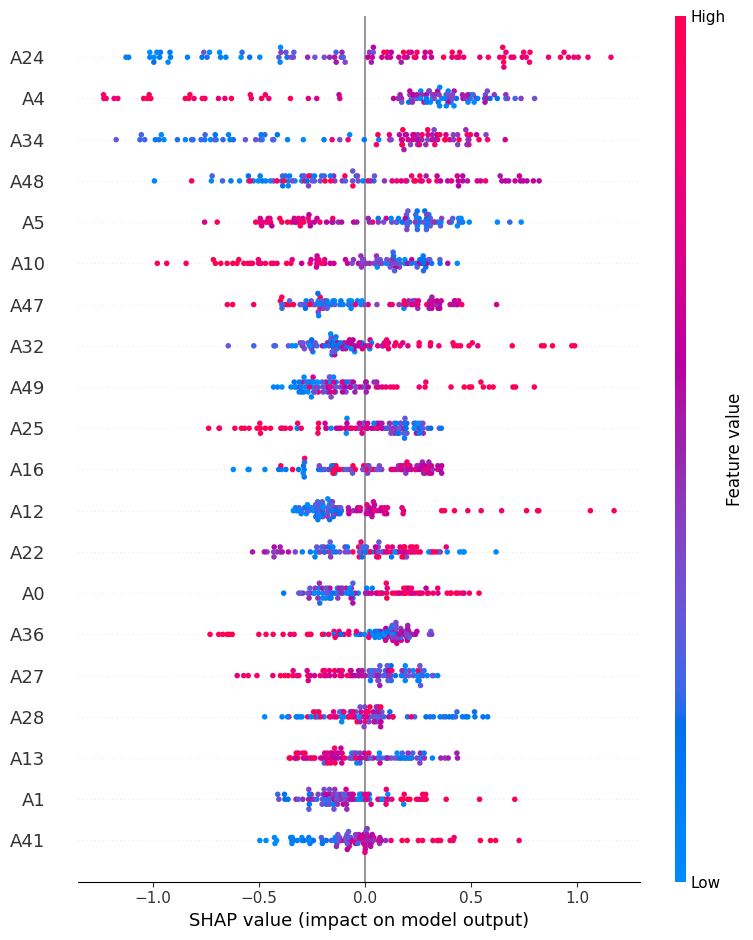

In [61]:
# 변수 중요도 시각화 (summary plot)
shap.summary_plot(shap_values, X_test)



In [62]:
# 상위 N개의 중요한 변수 선택
N = 10
shap_importance = np.abs(shap_values.values).mean(axis=0)
important_indices = np.argsort(shap_importance)[-N:]



AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
# 선택된 변수들로 새로운 데이터셋 생성
selected_X_test = X_test[:, important_indices]
selected_feature_names = [iris.feature_names[i] for i in important_indices]



In [ ]:
# 선택된 변수들로 SHAP summary plot 그리기
shap.summary_plot(shap_values[:, important_indices], selected_X_test, feature_names=selected_feature_names)


In [19]:
import shap
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [64]:
# 각 변수별 SHAP 값의 절대값 평균 계산
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)



In [65]:
# 중요도가 높은 순서로 변수 인덱스 정렬
top_indices = np.argsort(mean_abs_shap_values)[::-1][:10]



In [66]:
# 상위 10개 변수명 추출
top_features = X_test.columns[top_indices]

print("상위 10개 변수:")
print(top_features)

상위 10개 변수:
Index(['A24', 'A4', 'A34', 'A48', 'A5', 'A10', 'A47', 'A32', 'A49', 'A25'], dtype='object')


In [67]:
shap_values

array([[-3.0550224e-01, -2.0175113e-01, -1.1698228e-01, ...,
         0.0000000e+00, -3.0008769e-03,  0.0000000e+00],
       [-5.8265477e-02, -2.6673514e-01,  7.3475666e-02, ...,
         0.0000000e+00, -3.3485007e-02,  0.0000000e+00],
       [ 3.2048935e-01, -7.4955910e-02,  8.4145423e-03, ...,
         0.0000000e+00, -2.2309739e-04,  0.0000000e+00],
       ...,
       [ 5.9389070e-02, -9.2264377e-02,  6.9570817e-02, ...,
         0.0000000e+00, -2.4772349e-03,  0.0000000e+00],
       [ 2.0908423e-01, -1.9853839e-01, -4.3337461e-02, ...,
         0.0000000e+00, -2.9511359e-02,  0.0000000e+00],
       [ 1.4373161e-01, -1.0370210e-01,  5.8012444e-01, ...,
         0.0000000e+00,  5.6465436e-04,  0.0000000e+00]], dtype=float32)

In [69]:
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)

In [71]:
# 각 변수에 SHAP 값의 절대값을 가중치로 곱함
weighted_X = X_scaled * np.abs(shap_values)

In [82]:
# PCA 수행
pca = PCA(n_components=4)
X_pca = pca.fit_transform(weighted_X)



In [83]:
X_pca

array([[-1.2063006 , -0.12482899, -0.2638937 , -0.1348591 ],
       [ 0.61839692, -0.66525717, -0.50095599,  0.08346511],
       [-0.60440776, -0.2423177 ,  0.27591515, -0.16982937],
       [-0.26311351, -0.39517896, -0.69874024, -0.10322295],
       [ 1.49078944,  0.15621226, -0.18628842,  0.05324213],
       [-0.18483633,  0.81934678,  0.43523182, -0.26283326],
       [-0.06268911,  0.064568  ,  0.45899428, -0.15390215],
       [ 0.70211964, -0.47111427,  0.0270566 , -0.21404068],
       [-0.59341884, -0.79686172,  0.44066152, -0.34601942],
       [-0.41696132, -0.26984752,  1.06868431, -0.15054057],
       [-0.91435333, -0.28149624, -0.02070417, -0.50028681],
       [ 1.46837816,  1.04597032, -0.99792869,  0.63442861],
       [ 1.12816698, -0.18041996,  0.35308636,  0.28642836],
       [-0.27609312, -0.05553182, -0.53942408,  0.40769092],
       [-0.10090776, -0.56117351, -0.6137254 , -0.1423628 ],
       [ 0.41235855, -0.49431967, -0.56883011, -0.42327383],
       [-1.45079721, -0.

In [84]:
# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4'])



In [85]:
# 원래 데이터에 기관 정보 추가 (시각화를 위해)
pca_df['institution'] = data['institutions'].reset_index(drop=True)



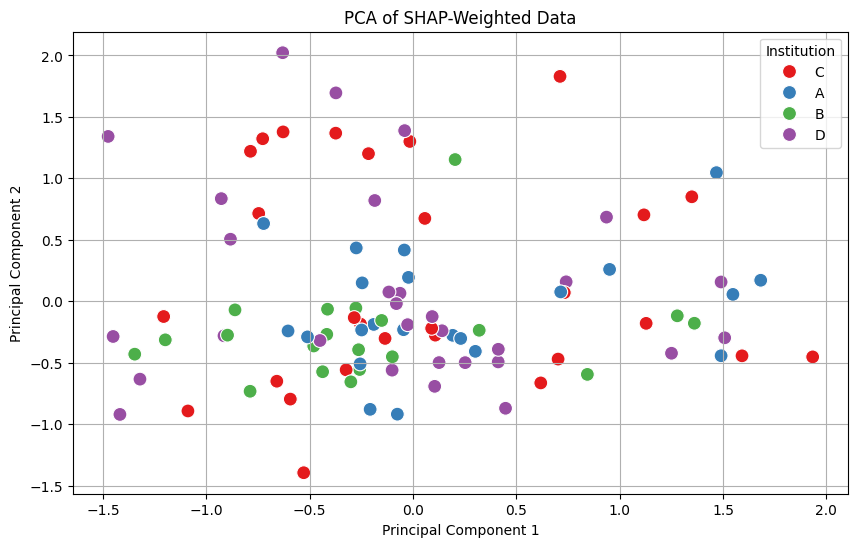

In [86]:
# PCA 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='institution', data=pca_df, palette='Set1', s=100)
plt.title('PCA of SHAP-Weighted Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Institution')
plt.grid(True)
plt.show()

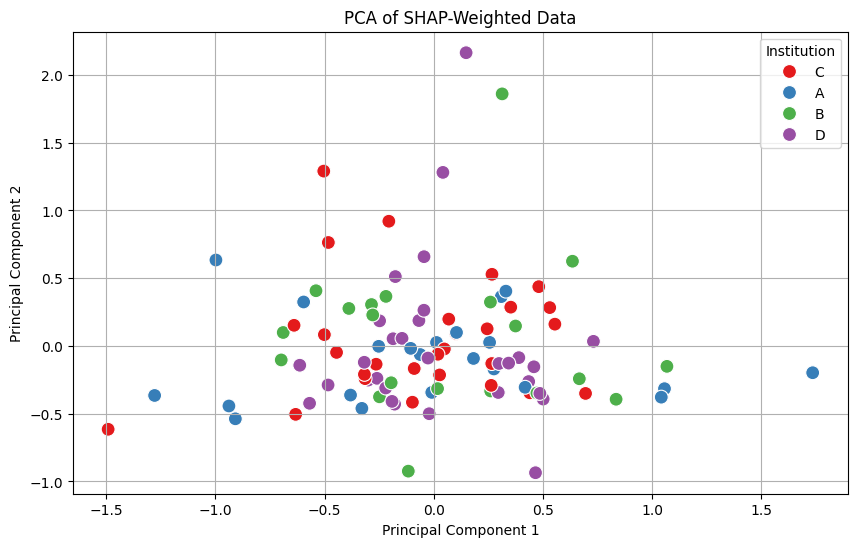

In [87]:
# PCA 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC3', y='PC4', hue='institution', data=pca_df, palette='Set1', s=100)
plt.title('PCA of SHAP-Weighted Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Institution')
plt.grid(True)
plt.show()

In [94]:
#### WORK2_ 그림


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap






In [92]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.7 MB/s eta 0:00:00


In [95]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

In [96]:
np.random.seed(42)
data = np.random.rand(800, 4)

In [98]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

CPU times: user 10.4 s, sys: 203 ms, total: 10.6 s
Wall time: 11.3 s


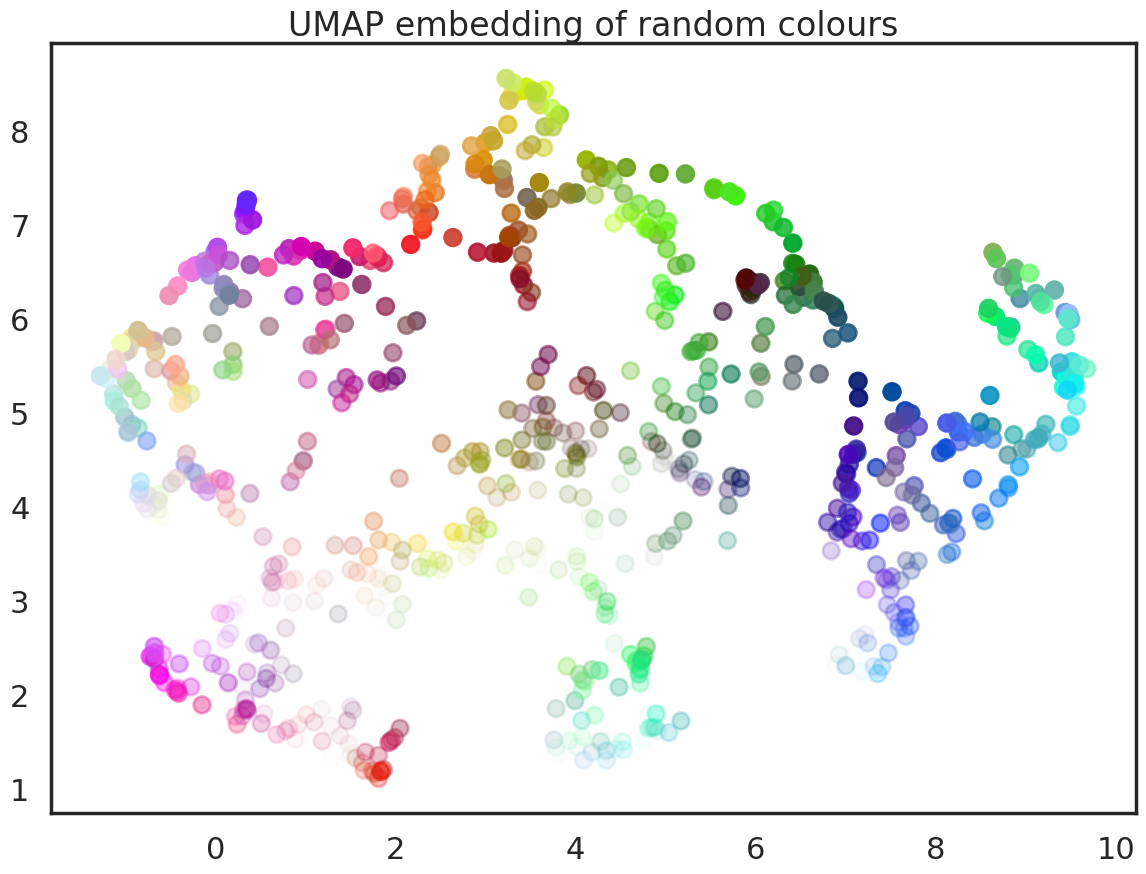

In [99]:
plt.scatter(u[:,0], u[:,1], c=data)
plt.title('UMAP embedding of random colours');